En kısa yol: ['Tolga', 'Hasan Amca', 'Serhan', 'Babam', 'Annem', 'Halil', 'Mustafa Dayı', 'Yakup']


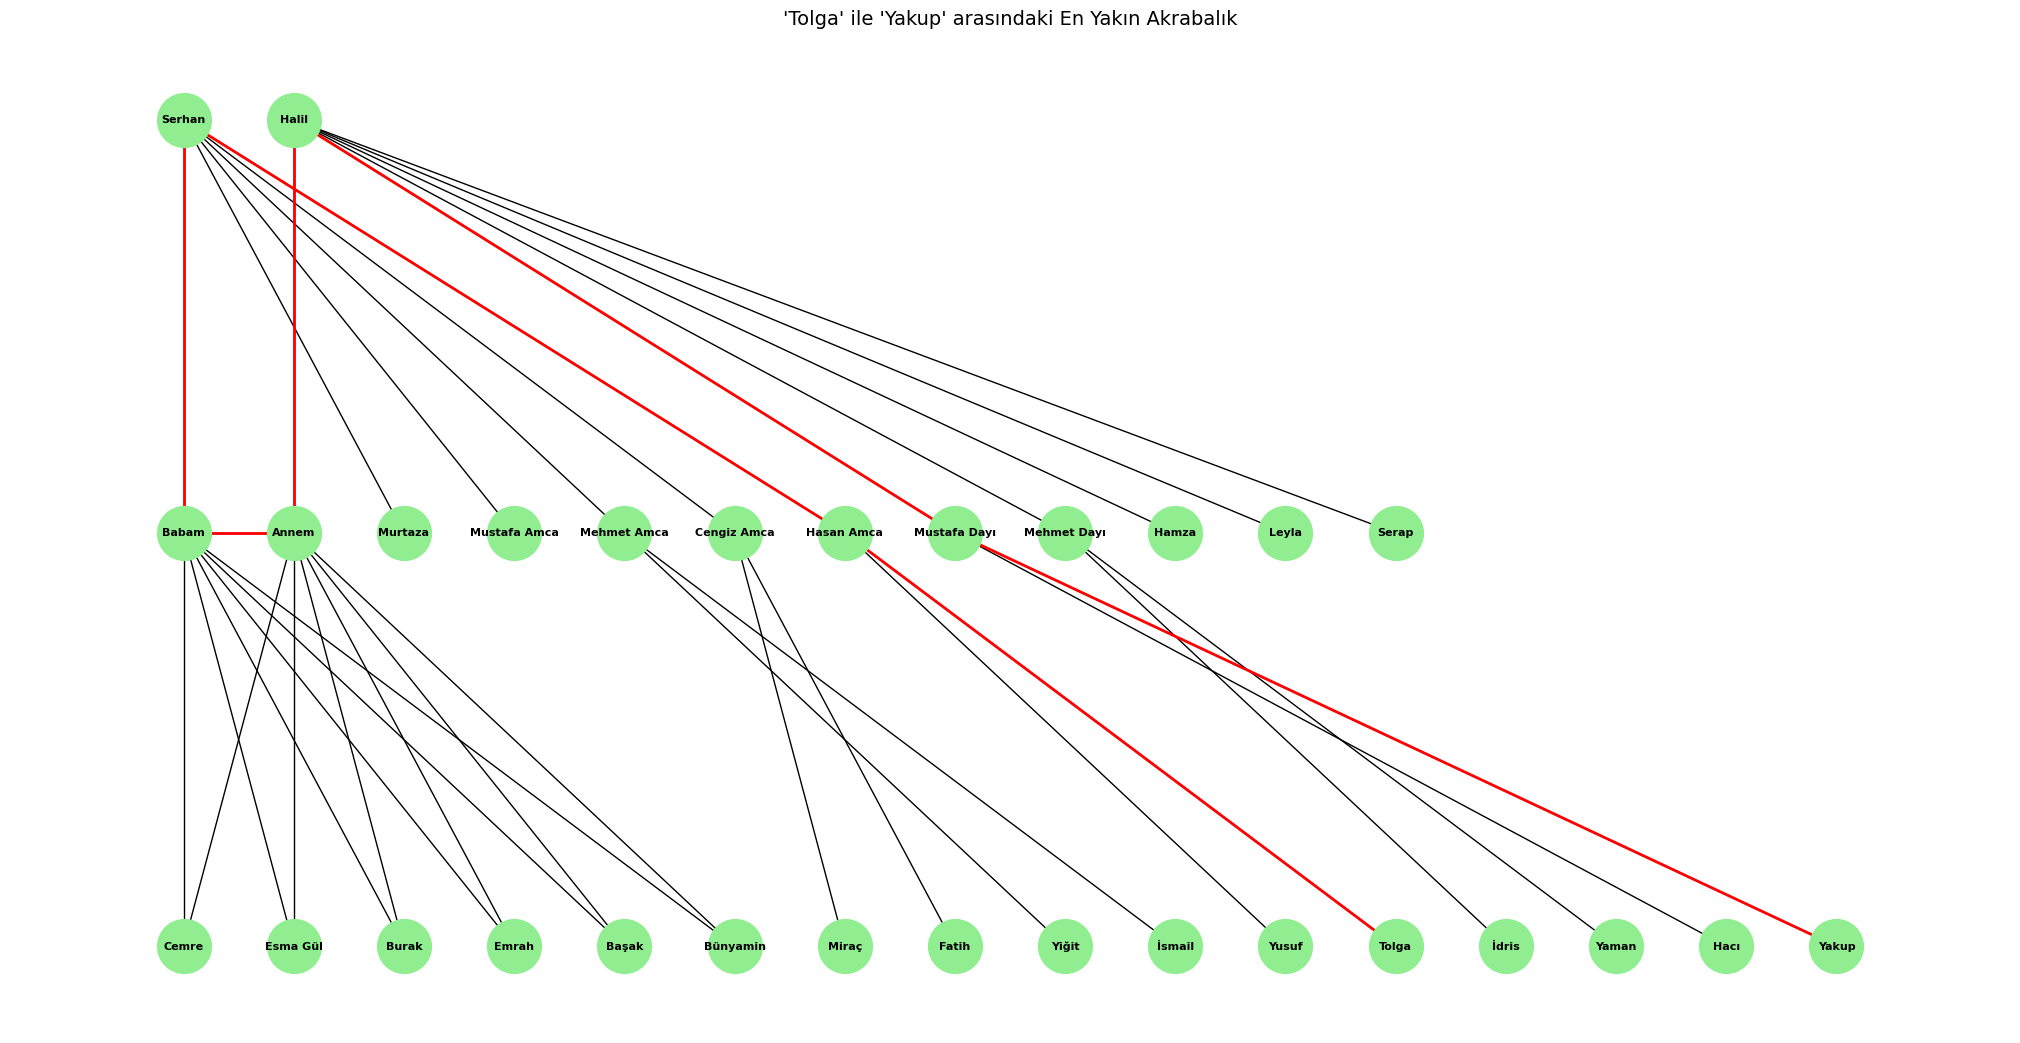

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Graf (aile ağacı)
G = nx.Graph()

# Dede ve Anne tarafı
dede_baba = "Serhan"
dede_anne = "Halil"

# Babam, Annem
baba = "Babam"
anne = "Annem"

# Amcalar
amcalar = ["Murtaza", "Mustafa Amca", "Mehmet Amca", "Cengiz Amca", "Hasan Amca"]

# Dayılar
dayilar = ["Mustafa Dayı", "Mehmet Dayı", "Hamza"]

# Teyzeler
teyzeler = ["Leyla", "Serap"]

# Kardeşler
kardesler = ["Cemre", "Esma Gül", "Burak", "Emrah", "Başak", "Bünyamin"]

# Kuzenler
kuzenler = {
    "Cengiz Amca": ["Miraç", "Fatih"],
    "Mehmet Amca": ["Yiğit", "İsmail"],
    "Hasan Amca": ["Yusuf", "Tolga"],
    "Mehmet Dayı": ["İdris", "Yaman"],
    "Mustafa Dayı": ["Hacı", "Yakup"]
}

# Bağlantıları oluşturalım
# Dede taraflarından bağlantılar
G.add_edge(dede_baba, baba)
for amca in amcalar:
    G.add_edge(dede_baba, amca)

G.add_edge(dede_anne, anne)
for dayi in dayilar:
    G.add_edge(dede_anne, dayi)
for teyze in teyzeler:
    G.add_edge(dede_anne, teyze)

# Babam ve Annem'den kardeşler
for kardes in kardesler:
    G.add_edge(baba, kardes)
    G.add_edge(anne, kardes)
    
# Babam ve Annem arasında evlilik bağı
G.add_edge(baba, anne)


# Amcalardan ve Dayılardan kuzenler
for ebeveyn, cocuklar in kuzenler.items():
    for cocuk in cocuklar:
        G.add_edge(ebeveyn, cocuk)

# Katman bilgisi (0 = dede, 1 = baba/anne/amca/dayı/teyze, 2 = kardeşler/kuzenler)
layer = {
    "Serhan": 0, "Halil": 0,
    "Babam": 1, "Murtaza": 1, "Mustafa Amca": 1, "Mehmet Amca": 1, "Cengiz Amca": 1, "Hasan Amca": 1,
    "Annem": 1, "Mustafa Dayı": 1, "Mehmet Dayı": 1, "Hamza": 1, "Leyla": 1, "Serap": 1,
    "Cemre": 2, "Esma Gül": 2, "Burak": 2, "Emrah": 2, "Başak": 2, "Bünyamin": 2,
    "Miraç": 2, "Fatih": 2, "Yiğit": 2, "İsmail": 2, "Yusuf": 2, "Tolga": 2, "İdris": 2, "Yaman": 2, "Hacı": 2, "Yakup": 2
}

# Heuristic fonksiyon: Katman farkı
def h(n, goal):
    return abs(layer[n] - layer[goal])

# A* algoritması ile en kısa yolu bulalım
start = "Tolga"  # Başlangıç kişi
end = "Yakup"    # Hedef kişi

path = nx.astar_path(G, start, end, heuristic=h)

print("En kısa yol:", path)

# Hiyerarşik pozisyon oluşturma
pos = {}
layer_nodes = {}  # Katmanlara göre grupla

for node, l in layer.items():
    layer_nodes.setdefault(l, []).append(node)

pos = {}
layer_nodes = {}

# Katmanlara göre gruplama
for node, l in layer.items():
    layer_nodes.setdefault(l, []).append(node)

for l, nodes in layer_nodes.items():
    # Eğer babam ve annem katmanındaysak özel sırala
    if l == 1:
        # Babam ve Annem başta, sonra diğerleri
        ordered = []
        if baba in nodes:
            ordered.append(baba)
        if anne in nodes:
            ordered.append(anne)
        for node in nodes:
            if node not in (baba, anne):
                ordered.append(node)
        nodes = ordered  # yeniden sırala
    
    # Pozisyonları ayarla
    for i, node in enumerate(nodes):
        pos[node] = (i, -l)


# Bulunan yolun kenarlarını belirle
yol_edges = list(zip(path, path[1:]))

# Grafiği çizelim
plt.figure(figsize=(20, 10))  # Geniş bir çizim
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=1500, font_size=8, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=yol_edges, edge_color="red", width=2)

plt.title(f"'{start}' ile '{end}' arasındaki En Yakın Akrabalık", fontsize=14)
plt.axis('off')
plt.show()
